Nama: Ngurah Gde Ariwhrihaspati
<br>Email: whrihaspati@gmail.com
<br>Nomor Registrasi DTS FGA 2022 ML Developer: 
1494037162101-947

In [3]:
! unzip iphone_se.zip

Archive:  iphone_se.zip
  inflating: APPLE_iPhone_SE.csv     


In [4]:
import pandas as pd

df = pd.read_csv('APPLE_iPhone_SE.csv')
df.tail()

,Ratings,Comment,Reviews
9708,5,Terrific purchase,Absolutely brilliantREAD MORE
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE..."
9710,5,Awesome,very niceREAD MORE
9711,5,Super!,Loving it as of now. Good Product .READ MORE
9712,5,Terrific purchase,NiceElegant ElectricREAD MORE


In [5]:
df = df.drop(columns='Comment', axis=1)
df.tail()

,Ratings,Reviews
9708,5,Absolutely brilliantREAD MORE
9709,5,"Superb phone. This is my 4th iPhone, I feel SE..."
9710,5,very niceREAD MORE
9711,5,Loving it as of now. Good Product .READ MORE
9712,5,NiceElegant ElectricREAD MORE


In [6]:
category = pd.get_dummies(df.Ratings)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='Ratings', axis=1)
df_new.head()

df_new = df_new.rename(columns={1:'very_bad',2:'bad',3:'normal',4:'good',5:'very_good'})
df_new.head()

,Reviews,very_bad,bad,normal,good,very_good
0,Great camera for pics and videos Battery life ...,0,0,0,0,1
1,Great device. Let me tell the Pros..1. Superb ...,0,0,0,0,1
2,"Who all loves older size i.e., 4.7 inch type s...",0,0,0,0,1
3,This iPhone SE is the best phone ever you get....,0,0,0,0,1
4,This is my second iphone after iphone 4s. I’ve...,0,0,0,0,1


In [7]:
df_new['Reviews'] = df_new['Reviews'].str.lower()
df_new.head()

,Reviews,very_bad,bad,normal,good,very_good
0,great camera for pics and videos battery life ...,0,0,0,0,1
1,great device. let me tell the pros..1. superb ...,0,0,0,0,1
2,"who all loves older size i.e., 4.7 inch type s...",0,0,0,0,1
3,this iphone se is the best phone ever you get....,0,0,0,0,1
4,this is my second iphone after iphone 4s. i’ve...,0,0,0,0,1


In [8]:
import nltk
nltk.download('stopwords')
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

stop_word = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r"\w+")

df_new['Reviews'] = df_new['Reviews'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_word)]))
df_new['Reviews'] = df_new['Reviews'].map(tokenizer.tokenize)
df_new.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Reviews,very_bad,bad,normal,good,very_good
0,"[great, camera, pics, videos, battery, life, g...",0,0,0,0,1
1,"[great, device, let, tell, pros, 1, superb, bu...",0,0,0,0,1
2,"[loves, older, size, i, e, 4, 7, inch, type, d...",0,0,0,0,1
3,"[iphone, se, best, phone, ever, get, beautiful...",0,0,0,0,1
4,"[second, iphone, iphone, 4s, i, ve, long, time...",0,0,0,0,1


In [28]:
review = df_new['Reviews'].values
label = df_new.iloc[:, 1:].values

top_review = review[0:1500]
top_label = label[0:1500]

print(top_review.shape)
print(top_label.shape)

(1500,)
(1500, 5)


In [29]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(top_review, top_label, test_size=0.2)

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(X_train) 
 
sekuens_latih = tokenizer.texts_to_sequences(X_train)
sekuens_test = tokenizer.texts_to_sequences(X_test)
 
padded_latih = pad_sequences(sekuens_latih, padding='post', maxlen=20, truncating='post') 
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=20, truncating='post')

In [35]:
import tensorflow as tf
from keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),

    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
 
    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
   
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
   

    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.8):
      print('\nAkurasi telah mencapai >80%!!')
      self.model.stop_training = True
callbacks = myCallback()

In [36]:
num_epochs = 30
history = model.fit(padded_latih, y_train, epochs=num_epochs, callbacks = [callbacks],
                    batch_size=128, validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
10/10 - 4s - loss: 1.5659 - accuracy: 0.6083 - val_loss: 1.2613 - val_accuracy: 0.6433 - 4s/epoch - 378ms/step
Epoch 2/30
10/10 - 0s - loss: 1.1556 - accuracy: 0.6492 - val_loss: 1.1374 - val_accuracy: 0.6433 - 425ms/epoch - 42ms/step
Epoch 3/30
10/10 - 0s - loss: 1.1047 - accuracy: 0.6492 - val_loss: 1.1258 - val_accuracy: 0.6433 - 437ms/epoch - 44ms/step
Epoch 4/30
10/10 - 0s - loss: 1.0656 - accuracy: 0.6492 - val_loss: 1.1054 - val_accuracy: 0.6433 - 430ms/epoch - 43ms/step
Epoch 5/30
10/10 - 0s - loss: 1.0448 - accuracy: 0.6492 - val_loss: 1.0922 - val_accuracy: 0.6433 - 436ms/epoch - 44ms/step
Epoch 6/30
10/10 - 0s - loss: 1.0202 - accuracy: 0.6492 - val_loss: 1.0781 - val_accuracy: 0.6433 - 426ms/epoch - 43ms/step
Epoch 7/30
10/10 - 0s - loss: 0.9542 - accuracy: 0.6492 - val_loss: 0.9901 - val_accuracy: 0.6433 - 444ms/epoch - 44ms/step
Epoch 8/30
10/10 - 0s - loss: 0.8145 - accuracy: 0.6492 - val_loss: 1.0931 - val_accuracy: 0.6433 - 448ms/epoch - 45ms/step
Epoch 9/30

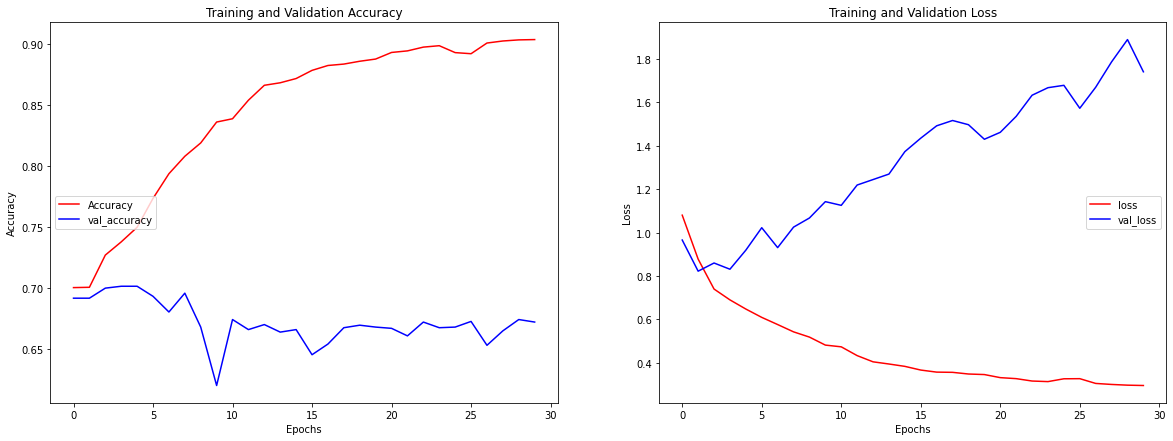

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

epochs = range(0,num_epochs)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax1.plot(epochs, acc, 'r', label='Accuracy')
ax1.plot(epochs, val_acc, 'b', label='val_accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='center left')
ax1.set_xlabel('Epochs')

ax2.plot(epochs, loss, 'r', label='loss')
ax2.plot(epochs, val_loss, 'b', label='val_loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='center right')
